In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

In [3]:
magazine_s = pd.read_csv('./magazine/final/magazine_Sl.csv', sep='|', encoding = 'utf-8')

In [4]:
magazine_s.head()

,magazine,brand,category,title,link,date,contents,title_brand,check,word_laurent,sentences_tag,ADFN,item
0,A,YSL,CELEBRITY,"깊게 뿌리내리기 위하여, 수영",http://www.allurekorea.com/2020/11/20/%ea%b9%8...,2020-11-20,['누구보다 본인에게 엄격하지만 수용할 줄 아는 너른 마음도 지녔다. 오늘도 부단히...,0,0,"['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","[('[', 'SS'), (""'"", 'SS'), ('빨갛', 'VA'), ('ㄴ',...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","['코트', '슈트', '부츠', 'LAURENT', 'LAURENT']"
1,A,YSL,FASHION,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-10-26,"['겨울이 오기 전 기억해야 할 코트의 면면.', '90’S STANDARD', '...",0,0,"['클래식한 캐멀 컬러 코트는 1백78만원, 우영미(Wooyoungmi). 버건디 ...","[('[', 'SS'), (""'"", 'SS'), ('클래식', 'NNG'), ('하...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',...","['코트', '셔츠', '스커트', 'LAURENT', 'LAURENT', '코트'..."
2,A,YSL,FASHION,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-10-26,['데님 팬츠를 선택할 때 가장 중요한 것은 자신의 체형에 맞는 핏을 고르는 것이다...,0,0,"[' 짙은 그레이 컬러의 데님 팬츠는 95만5천원, 생로랑 바이 안토니 바카렐로(...","[('[', 'SS'), (""'"", 'SS'), ('짙', 'VV'), ('은', ...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT...","['데님', '팬츠', 'LAURENT', 'LAURENT']"
3,A,YSL,FASHION,안경 하세요?!,http://www.allurekorea.com/2020/10/29/%ec%95%8...,2020-10-23,['모든 게 익고 마는 금빛 가을에는 탐스러운 금테 안경을. 전체 메탈로 장식한 다...,0,0,"[' YSL 모노그램을 새긴 블랙 에나멜 안경다리의 둥근 금테 안경은 40만원대,...","[('[', 'SS'), (""'"", 'SS'), ('YSL', 'OL'), ('모노...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',...","['LAURENT', 'LAURENT']"
4,A,YSL,FASHION,"가을의 정석, 트렌치 코트 입는 법 8가지",http://www.allurekorea.com/2020/10/11/%ea%b0%8...,2020-09-27,"['정직하고 말끔하게, 혹은 자유롭고 분방하게. 변화무쌍한 계절처럼 다양한 모습을 ...",0,0,"['컬러블록 트렌치코트는 가격미정, 르쥬(Leje). 컵케이크 프린트 티셔츠는 27...","[('[', 'SS'), (""'"", 'SS'), ('컬러', 'NNG'), ('블록...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ...","['코트', '티셔츠', '데님', '팬츠', '벨트', '슈즈', '선글라스', ..."


In [5]:
len(magazine_s)

1274

In [183]:
mag_s = magazine_s[['magazine', 'brand','title', 'link', 'date', 'word_laurent','ADFN']]

In [184]:
mag_s['date'] = mag_s['date'].str.replace('/', '-').str.replace('.', '-')

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
mag_s.head()

,magazine,brand,title,link,date,word_laurent,ADFN
0,A,YSL,"깊게 뿌리내리기 위하여, 수영",http://www.allurekorea.com/2020/11/20/%ea%b9%8...,2020-11-20,"['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '..."
1,A,YSL,코트 체크,http://www.allurekorea.com/2020/11/10/%ec%bd%9...,2020-10-26,"['클래식한 캐멀 컬러 코트는 1백78만원, 우영미(Wooyoungmi). 버건디 ...","['클래식', '컬러', '코트', '우영', 'WOOYOUNGMI', '버건디',..."
2,A,YSL,데님이여 영원하라,http://www.allurekorea.com/2020/11/06/%eb%8d%b...,2020-10-26,"[' 짙은 그레이 컬러의 데님 팬츠는 95만5천원, 생로랑 바이 안토니 바카렐로(...","['짙', '그레이', '컬러', '데님', '팬츠', 'LAURENT', 'ANT..."
3,A,YSL,안경 하세요?!,http://www.allurekorea.com/2020/10/29/%ec%95%8...,2020-10-23,"[' YSL 모노그램을 새긴 블랙 에나멜 안경다리의 둥근 금테 안경은 40만원대,...","['YSL', '모노그램', '새기', '블랙', '에나멜', '안경', '다리',..."
4,A,YSL,"가을의 정석, 트렌치 코트 입는 법 8가지",http://www.allurekorea.com/2020/10/11/%ea%b0%8...,2020-09-27,"['컬러블록 트렌치코트는 가격미정, 르쥬(Leje). 컵케이크 프린트 티셔츠는 27...","['컬러', '블록', '트렌치', '코트', 'LEJE', '컵', '케이크', ..."


In [186]:
mag_s.loc[0, 'ADFN'][2]

'빨'

In [187]:
mag_s['ADFN_2'] = mag_s['ADFN']

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
len(mag_s)

1274

In [189]:
mag_s.to_csv('./magazine/final/magazine_SaintLaurent.csv', sep = '|', encoding = 'utf-8')

### 쪼개진 단어 붙이기

#### 사전에 등록했으면 하는 단어
['레디 투 웨어', '공방', '트위드', 'FW', 'F/W', 'SS', 'S/S', '오간자', '아름다움', '그랑 팔레', '캐주얼', '런웨이', 
 '오프숄더', '레이어드', '인스타그램', '스타일링']

In [276]:
for word in mag_s['word_laurent']:
    if '라텍스' in word:
        print(word)
        print('-'*50)

['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모두 생로랑 바이 안토니 바카렐로(Saint Laurent by Anthony Vaccarello). 골드 반지는 이에르 로르 (Hyeres Lor).']
--------------------------------------------------
['\'블랙핑크 로제가 파리의 패션 자존심 ‘생로랑’과 함께 한 화보에서 파격의 라텍스룩을 선보였다.\', \'올해부터 한국인 최초로 ‘생로랑(Saint Laurent)’의 공식 글로벌 뮤즈된 로제는 생로랑과 크리에이티브 디렉터인 안토니 바카렐로에 대한 이해와 애정을 피력했다.\', \'로제는 “클래식에 대해 잘 알고 있다고 생각했는데 아니었어요. 안토니의 옷을 보면서 늘 다시 배우게 돼요. 라텍스라는 소재로 어떻게 이런 표현을 할 수 있을까 싶어요. 컬러 스펙트럼과 패턴도 굉장히 다양한데 그 모든 것을 관통하는 특유의 ‘클래식함’이 있는 것 같아요”라며 생로랑의 클래식에 대해 견해를 밝혔다. \', "한편, 블랙핑크는 정규 1집 \'디 앨범\'(THE ALBUM)으로 2주 연속 미국 빌보드 메인 앨범 차트 최상위권을 유지했다. 빌보드가 20일(현지시간) 발표한 최신 차트에 따르면 블랙핑크 정규 1집 \'디 앨범\'은 \'빌보드 200\'서 6위를 차지했으며, 빌보드 \'톱 앨범 세일즈\' 차트에서는 1위에 오르는 성과를 거뒀다.", \'패션엔 김금희 기자\\nfashionn@fashionn.com\'']
--------------------------------------------------
['특히 라텍스는 인조적이고 미래적인 모습이지만 사실 나무 수액에서 유래된 채식주의적이고 유기농적인 물질이다. 생로랑은 이번 시즌 라텍스로 가장 주목을 받았다. 생로랑은 박시한 슈트 재킷, 섹스한 드레스와 라텍스 레깅스를 매치하는 등 라텍스의 모든 것을 보여주었다.']
--------------------------------------------

In [191]:
for word in mag_s['ADFN_2']:
    if '레트' in word:
        print(word)
        print('-'*50)

['보타이', '오버올', '슈트', '버뮤다', '쇼', '시즌', '데님', '레트', '무드', '존재', '레트', '스타일', '강조', 'LAURENT', '컬렉션', '살펴보', '도움', '스카프', '활용', '헤어', '장식', '백', '장식', '팁', '얻', '골드', '터번', '화이트', '셔츠', '블랙', '피', '라펠', '재킷', '데님', '쇼', '가죽', '배', '로고', '샌들', '에스', '크리', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHONY']
--------------------------------------------------
['시즌', '주목', '팬츠', '버뮤다', '팬츠', '버뮤다', '지역', '원주민', '덜', '무릎', '길이', '팬츠', '유래', '트렌드', '작년', '시즌', '유효', 'LAURENT', '지방시', '그리하', '소재', '따르', '오피스', '레트', '풍의', '히피', '스타일', '소화', '단', '비율', '해지', '버뮤다', '팬츠', '고르', '종아리', '긷', '무릎', '길이', '선택']
--------------------------------------------------
['LAURENT', '카페', 'LAURENT', '리브', 'LAURENT', 'RIVE', 'DROITE', '파리', '넘', '콘셉트', '스토어', '명성', '덜', '콜레트', '폐점', '자리', '들어서', 'LAURENT', '리브', 'RIVE', 'DROITE', '패션', '제품군', '눈길', '사로잡', '곳', '하이테크', '라이프', '스타일', '오피스', '아이템', '매장', '옆', '위치', 'LAURENT', '카페', 'SNS', '핫이슈', '떠오르', 'LAURENT', '로고', '새겨지', '블랙', '컵', '홀더', '텀블러', '에스프레소', '잔', '구매', '욕구

In [192]:
# 테일러 / 레이어
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'테일러', '링'", "테일러링")
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'레이어', '링'", "레이어링")

mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'에스', '닉'", "에스닉")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [193]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'DESIGN'", "디자인")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'피', '부과'", "피부과")
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'패', '피'", "패피")
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'유', '러', '피', '언'", "유러피언")



C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [195]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'밀레', '얼'", "밀레니얼")


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'신', '제품'", "신제품")

C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'DESIGN'", "디자인")

mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'새롭'", "새로운")
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'새'", "새로운")

mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'YSL'", "LAURENT")

mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace("'레트'", "레트로")


C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wnsgo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [236]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [237]:
sw_df.columns = ['stopword']

In [238]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [239]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [240]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [241]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어', '링',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해', '', '이후', 'VALENTINO', '이렇', '이전', '유재', '만큼',
        '미우', '밝히', '방식', '나오', '케어', '시절', '열리', '런', '위크', '루', '우', '처음', '뉴', '메', '감',  '골', 'F', 'W',
        '비통', '헤', '찾', '만나', '피에르', '듣', '따르', '예정', '좋아하', '올해', '눈',
        '끌', '젊', '엘', '곳', '돋보이', '신', '피', 'SALVATORE', 'FERRAGAMO', '해지', '활동', '마지막', '살',  '스',
        'CALVIN', 'KLEIN', 'COM','담','얻','마크', '포드','크리스', '엘','활동', '맡', '글', '과거', 
        '약', '올', '강조','백은','당시', '현재', '내놓', '출신', '맥', '스키', '높', '하다', '세', '남', '발', '지', '소', '셀', 
         '중요', '반', '쿠션', '룰', '맞', '느끼', '베르제', 'KARL', '지방시', '조', '토', '걸', '이르', '가깝', '프랑', '선', '버버리', 
         '갖추', '즐기', '이루', '면', '치아', 'BETTY', 'CATROUX', '베네', '눈여겨보', '반', '갖추', '나이',
         '열리', '원', '다르', '멀', '벨', '드러내', '까', '블', '파', '점', '일하', ]
for w in add_0:
    stop_words.append(w)

In [242]:
len(stop_words)

932

In [243]:
mag_s['ADFN_2'] = mag_s['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

AttributeError: Can only use .str accessor with string values!

In [244]:
before = mag_s[mag_s['date'].str.replace('-', '').str[:6].astype(int)<202002]
after = mag_s[mag_s['date'].str.replace('-', '').str[:6].astype(int)>=202002]

before.reset_index(drop = True, inplace = True)
after.reset_index(drop = True, inplace = True)

In [245]:
print('before', len(before))
print('after', len(after))

before 1070
after 204


In [246]:
noun_adj_list = []
for i in range(len(mag_s)):
    for word in mag_s.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [247]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('LAURENT', 2368), ('패션', 690), ('컬렉션', 559), ('브랜드', 532), ('디자이너', 420), ('ANTHONY', 371), ('쇼', 370), ('HEDI', 348), ('드레스', 340), ('소재', 316), ('스타일', 316), ('모델', 298), ('여성', 288), ('파리', 284), ('시즌', 277), ('새로운', 270), ('팬츠', 269), ('장식', 254), ('디자인', 244), ('재킷', 234), ('하우스', 214), ('컬러', 204), ('옷', 187), ('가죽', 186), ('부츠', 178), ('그룹', 176), ('디렉터', 176), ('블랙', 154), ('아이템', 154), ('슈트', 153), ('프랑스', 144), ('럭셔리', 141), ('CREATIVE', 133), ('COUTURE', 131), ('코트', 130), ('데님', 129), ('로고', 128), ('셔츠', 124), ('여름', 122), ('영감', 121), ('슈즈', 119), ('봄', 118), ('좋', 116), ('선글라스', 114), ('세계', 114), ('캠페인', 114), ('실루엣', 113), ('영화', 109), ('시대', 105), ('어깨', 104), ('전시', 104), ('사랑', 101), ('톱', 99), ('라인', 96), ('수트', 96), ('미니', 95), ('패션계', 95), ('뷰티', 94), ('남성복', 94), ('하이', 90), ('스커트', 90), ('완성', 90), ('트렌드', 90), ('시크', 90), ('패턴', 89), ('의상', 88), ('자리', 86), ('숄더', 85), ('분위기', 85), ('클래식', 84), ('무드', 84), ('파워', 84), ('패션쇼', 84), ('화이트', 82), ('완벽', 82), ('작

In [248]:
common = [ '모델', '패션', '컬렉션', '백', '브랜드',  '쇼' , '룩', '파리', '디자인', '디자이너', 'COUTURE', '세계', '장식',
          '드레스', '여성', '봄', '여름', '가을', '겨울', '광고', 'DESIGN', 'LADY', '시즌', '새로운', '런웨이']

In [249]:
b_noun_adj_list = []
for i in range(len(before)):
    for word in before.loc[i, 'ADFN_2']:
        if word not in stop_words:
            if word not in common:
                b_noun_adj_list.append(word)

In [250]:
b_word = Counter(b_noun_adj_list)
print(b_word.most_common(200))

[('LAURENT', 1980), ('HEDI', 320), ('ANTHONY', 285), ('소재', 283), ('스타일', 270), ('팬츠', 215), ('재킷', 199), ('하우스', 198), ('컬러', 179), ('옷', 167), ('부츠', 161), ('그룹', 156), ('디렉터', 153), ('가죽', 150), ('슈트', 129), ('블랙', 127), ('럭셔리', 123), ('아이템', 116), ('프랑스', 116), ('로고', 115), ('CREATIVE', 115), ('영감', 110), ('데님', 109), ('슈즈', 107), ('코트', 101), ('캠페인', 101), ('셔츠', 99), ('어깨', 99), ('좋', 96), ('실루엣', 95), ('시대', 94), ('영화', 90), ('전시', 89), ('사랑', 87), ('톱', 86), ('라인', 85), ('뷰티', 85), ('미니', 85), ('패션계', 84), ('남성복', 80), ('완성', 79), ('숄더', 79), ('수트', 79), ('하이', 78), ('트렌드', 77), ('의상', 76), ('자리', 75), ('선글라스', 75), ('이미지', 75), ('파워', 74), ('무드', 73), ('분위기', 73), ('화이트', 72), ('뉴욕', 72), ('완벽', 72), ('패턴', 71), ('시크', 70), ('데뷔', 70), ('선택', 69), ('클래식', 69), ('프린트', 69), ('스타', 68), ('ALEXANDER', 68), ('트', 67), ('작품', 67), ('MARRAKECH', 67), ('작업', 65), ('배우', 64), ('유명', 64), ('매출', 64), ('반짝이', 63), ('문화', 63), ('매장', 62), ('패션쇼', 62), ('자유', 61), ('성장', 60), ('스커트', 59),

In [251]:
a_noun_adj_list = []
for i in range(len(after)):
    for word in after.loc[i, 'ADFN_2']:
        if word not in stop_words:
            if word not in common:
                a_noun_adj_list.append(word)

In [252]:
a_word = Counter(a_noun_adj_list)
print(a_word.most_common(200))

[('LAURENT', 388), ('ANTHONY', 86), ('팬츠', 54), ('스타일', 46), ('선글라스', 39), ('아이템', 38), ('가죽', 36), ('재킷', 35), ('베스트', 34), ('로제', 34), ('소재', 33), ('스커트', 31), ('라텍스', 30), ('코트', 29), ('HEDI', 28), ('프랑스', 28), ('블랙', 27), ('컬러', 25), ('셔츠', 25), ('슈트', 24), ('마스크', 23), ('디렉터', 23), ('패션쇼', 22), ('데님', 20), ('좋', 20), ('그룹', 20), ('옷', 20), ('시크', 20), ('영화', 19), ('패턴', 18), ('활용', 18), ('럭셔리', 18), ('실루엣', 18), ('CREATIVE', 18), ('부츠', 17), ('몸', 17), ('스타일링', 17), ('수트', 17), ('하우스', 16), ('클래식', 15), ('전시', 15), ('칼라', 15), ('블라우스', 14), ('사랑', 14), ('작품', 14), ('BLACKPINK', 14), ('남성복', 14), ('로고', 13), ('형태', 13), ('앨범', 13), ('톱', 13), ('트렌드', 13), ('생산', 13), ('캠페인', 13), ('남성', 13), ('하이', 12), ('슈즈', 12), ('버뮤다', 12), ('느낌', 12), ('분위기', 12), ('기부', 12), ('의상', 12), ('라인', 11), ('다리', 11), ('톤', 11), ('영감', 11), ('완성', 11), ('스카프', 11), ('패션계', 11), ('무드', 11), ('존재', 11), ('자리', 11), ('매력', 11), ('피스', 11), ('시대', 11), ('골드', 10), ('화이트', 10), ('하트', 10), ('색', 10), ('미니

In [254]:
print(b_word.most_common(100))
print('-'*50)
print(a_word.most_common(100))

[('LAURENT', 1980), ('HEDI', 320), ('ANTHONY', 285), ('소재', 283), ('스타일', 270), ('팬츠', 215), ('재킷', 199), ('하우스', 198), ('컬러', 179), ('옷', 167), ('부츠', 161), ('그룹', 156), ('디렉터', 153), ('가죽', 150), ('슈트', 129), ('블랙', 127), ('럭셔리', 123), ('아이템', 116), ('프랑스', 116), ('로고', 115), ('CREATIVE', 115), ('영감', 110), ('데님', 109), ('슈즈', 107), ('코트', 101), ('캠페인', 101), ('셔츠', 99), ('어깨', 99), ('좋', 96), ('실루엣', 95), ('시대', 94), ('영화', 90), ('전시', 89), ('사랑', 87), ('톱', 86), ('라인', 85), ('뷰티', 85), ('미니', 85), ('패션계', 84), ('남성복', 80), ('완성', 79), ('숄더', 79), ('수트', 79), ('하이', 78), ('트렌드', 77), ('의상', 76), ('자리', 75), ('선글라스', 75), ('이미지', 75), ('파워', 74), ('무드', 73), ('분위기', 73), ('화이트', 72), ('뉴욕', 72), ('완벽', 72), ('패턴', 71), ('시크', 70), ('데뷔', 70), ('선택', 69), ('클래식', 69), ('프린트', 69), ('스타', 68), ('ALEXANDER', 68), ('트', 67), ('작품', 67), ('MARRAKECH', 67), ('작업', 65), ('배우', 64), ('유명', 64), ('매출', 64), ('반짝이', 63), ('문화', 63), ('매장', 62), ('패션쇼', 62), ('자유', 61), ('성장', 60), ('스커트', 59),

In [255]:
count = Counter(noun_adj_list)

In [256]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('LAURENT', 2368)
('패션', 690)
('컬렉션', 559)
('브랜드', 532)
('디자이너', 420)
('ANTHONY', 371)
('쇼', 370)
('HEDI', 348)
('드레스', 340)
('소재', 316)
('스타일', 316)
('모델', 298)
('여성', 288)
('파리', 284)
('시즌', 277)
('새로운', 270)
('팬츠', 269)
('장식', 254)
('디자인', 244)
('재킷', 234)
('하우스', 214)
('컬러', 204)
('옷', 187)
('가죽', 186)
('부츠', 178)
('그룹', 176)
('디렉터', 176)
('블랙', 154)
('아이템', 154)
('슈트', 153)
('프랑스', 144)
('럭셔리', 141)
('CREATIVE', 133)
('COUTURE', 131)
('코트', 130)
('데님', 129)
('로고', 128)
('셔츠', 124)
('여름', 122)
('영감', 121)
('슈즈', 119)
('봄', 118)
('좋', 116)
('선글라스', 114)
('세계', 114)
('캠페인', 114)
('실루엣', 113)
('영화', 109)
('시대', 105)
('어깨', 104)
('전시', 104)
('사랑', 101)
('톱', 99)
('라인', 96)
('수트', 96)
('미니', 95)
('패션계', 95)
('뷰티', 94)
('남성복', 94)
('하이', 90)
('스커트', 90)
('완성', 90)
('트렌드', 90)
('시크', 90)
('패턴', 89)
('의상', 88)
('자리', 86)
('숄더', 85)
('분위기', 85)
('클래식', 84)
('무드', 84)
('파워', 84)
('패션쇼', 84)
('화이트', 82)
('완벽', 82)
('작품', 81)
('이미지', 81)
('백', 79)
('다르', 78)
('뉴욕', 78)
('프린트', 77)
('선택', 77)
(

In [257]:
b_count = Counter(b_noun_adj_list)
a_count = Counter(a_noun_adj_list)

In [258]:
b_word_list = b_count.most_common(500)
for v in b_word_list:
    print(v)

('LAURENT', 1980)
('HEDI', 320)
('ANTHONY', 285)
('소재', 283)
('스타일', 270)
('팬츠', 215)
('재킷', 199)
('하우스', 198)
('컬러', 179)
('옷', 167)
('부츠', 161)
('그룹', 156)
('디렉터', 153)
('가죽', 150)
('슈트', 129)
('블랙', 127)
('럭셔리', 123)
('아이템', 116)
('프랑스', 116)
('로고', 115)
('CREATIVE', 115)
('영감', 110)
('데님', 109)
('슈즈', 107)
('코트', 101)
('캠페인', 101)
('셔츠', 99)
('어깨', 99)
('좋', 96)
('실루엣', 95)
('시대', 94)
('영화', 90)
('전시', 89)
('사랑', 87)
('톱', 86)
('라인', 85)
('뷰티', 85)
('미니', 85)
('패션계', 84)
('남성복', 80)
('완성', 79)
('숄더', 79)
('수트', 79)
('하이', 78)
('트렌드', 77)
('의상', 76)
('자리', 75)
('선글라스', 75)
('이미지', 75)
('파워', 74)
('무드', 73)
('분위기', 73)
('화이트', 72)
('뉴욕', 72)
('완벽', 72)
('패턴', 71)
('시크', 70)
('데뷔', 70)
('선택', 69)
('클래식', 69)
('프린트', 69)
('스타', 68)
('ALEXANDER', 68)
('트', 67)
('작품', 67)
('MARRAKECH', 67)
('작업', 65)
('배우', 64)
('유명', 64)
('매출', 64)
('반짝이', 63)
('문화', 63)
('매장', 62)
('패션쇼', 62)
('자유', 61)
('성장', 60)
('스커트', 59)
('레드', 58)
('남성', 58)
('남자', 58)
('빈티지', 58)
('골드', 57)
('여자', 57)
('무대', 57)

In [259]:
a_word_list = a_count.most_common(500)
for v in a_word_list:
    print(v)

('LAURENT', 388)
('ANTHONY', 86)
('팬츠', 54)
('스타일', 46)
('선글라스', 39)
('아이템', 38)
('가죽', 36)
('재킷', 35)
('베스트', 34)
('로제', 34)
('소재', 33)
('스커트', 31)
('라텍스', 30)
('코트', 29)
('HEDI', 28)
('프랑스', 28)
('블랙', 27)
('컬러', 25)
('셔츠', 25)
('슈트', 24)
('마스크', 23)
('디렉터', 23)
('패션쇼', 22)
('데님', 20)
('좋', 20)
('그룹', 20)
('옷', 20)
('시크', 20)
('영화', 19)
('패턴', 18)
('활용', 18)
('럭셔리', 18)
('실루엣', 18)
('CREATIVE', 18)
('부츠', 17)
('몸', 17)
('스타일링', 17)
('수트', 17)
('하우스', 16)
('클래식', 15)
('전시', 15)
('칼라', 15)
('블라우스', 14)
('사랑', 14)
('작품', 14)
('BLACKPINK', 14)
('남성복', 14)
('로고', 13)
('형태', 13)
('앨범', 13)
('톱', 13)
('트렌드', 13)
('생산', 13)
('캠페인', 13)
('남성', 13)
('하이', 12)
('슈즈', 12)
('버뮤다', 12)
('느낌', 12)
('분위기', 12)
('기부', 12)
('의상', 12)
('라인', 11)
('다리', 11)
('톤', 11)
('영감', 11)
('완성', 11)
('스카프', 11)
('패션계', 11)
('무드', 11)
('존재', 11)
('자리', 11)
('매력', 11)
('피스', 11)
('시대', 11)
('골드', 10)
('화이트', 10)
('하트', 10)
('색', 10)
('미니', 10)
('포인트', 10)
('레트로', 10)
('자유', 10)
('웨어', 10)
('완벽', 10)
('파워', 10)
('미국'

In [269]:
sl_before_ADFN_rank_df = pd.DataFrame(b_word_list)
sl_after_ADFN_rank_df = pd.DataFrame(a_word_list)

sl_before_ADFN_rank_df.columns = ['word', 'count']
sl_after_ADFN_rank_df.columns = ['word', 'count']

In [275]:
sl_after_ADFN_rank_df[40:60]

,word,count
40,전시,15
41,칼라,15
42,블라우스,14
43,사랑,14
44,작품,14
45,BLACKPINK,14
46,남성복,14
47,로고,13
48,형태,13
49,앨범,13


In [262]:
import matplotlib.pyplot as plt

In [263]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [264]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

In [265]:
from wordcloud import WordCloud

In [266]:
wc = WordCloud(font_path=font_path, background_color= '#272727', width=600, height=400, colormap = 'BuPu')

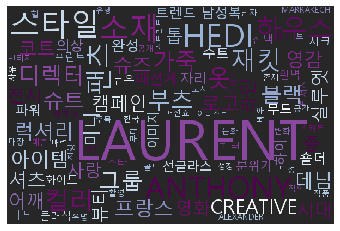

In [267]:
wc.generate_from_frequencies(dict(b_word_list[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/sl_before100.png')

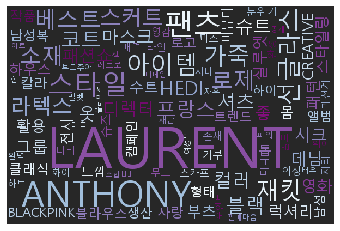

In [268]:
wc.generate_from_frequencies(dict(a_word_list[:100]))

plt.imshow(wc) 
plt.axis('off') 

# plt.savefig('./final_img/rose_total50.png', bbox_inches = 'tight')
plt.show()


wc.to_file('./final_img/sl_after100.png')

In [30]:
s_ADFN_rank_df = pd.DataFrame(word_list)

In [31]:
s_ADFN_rank_df.columns = ['word', 'count']

In [32]:
s_ADFN_rank_df.to_csv('./magazine/final/s_ADFN_rank_dropword.csv', sep='|', encoding='utf-8', index = False)

In [33]:
mag_s.to_csv('./magazine/final/magazine_s_stickword.csv', sep='|', encoding ='utf-8', index=False)